In [2]:
%matplotlib widget

from sklearn.datasets import make_swiss_roll
from utils import embedding, build, visualization, weights, features
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import trustworthiness

/home/jr/.pyenv/versions/3.6.15/envs/gml-final/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


# Create swissroll

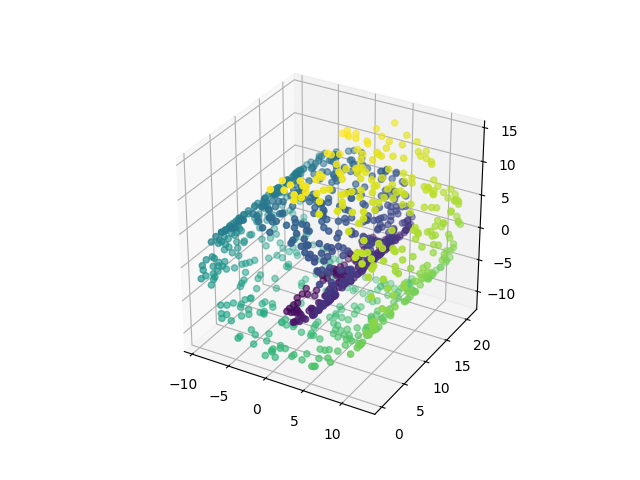

In [4]:
data, labels = make_swiss_roll(n_samples=1000, noise=0.0, random_state=0)
visualization.show_data(data, labels=labels, square=True)

# Reference with PCA and UMAP

0.9105475806451613


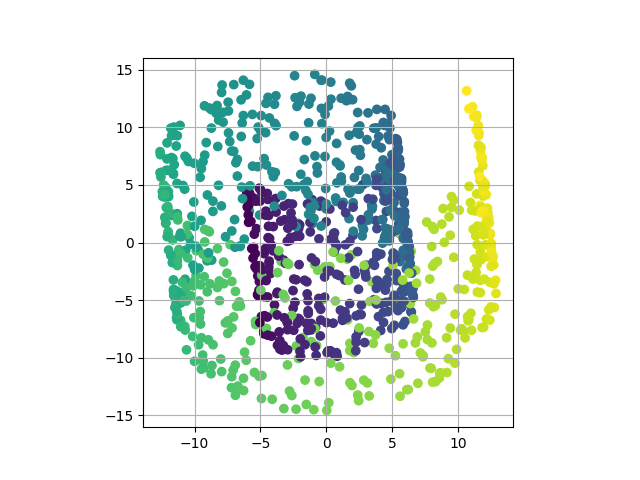

In [26]:
pca = PCA(n_components=2)
pca_projection = pca.fit_transform(data)

print(trustworthiness(data, pca_projection))
visualization.show_data(pca_projection, labels=labels, square=True)

0.9997540865384615


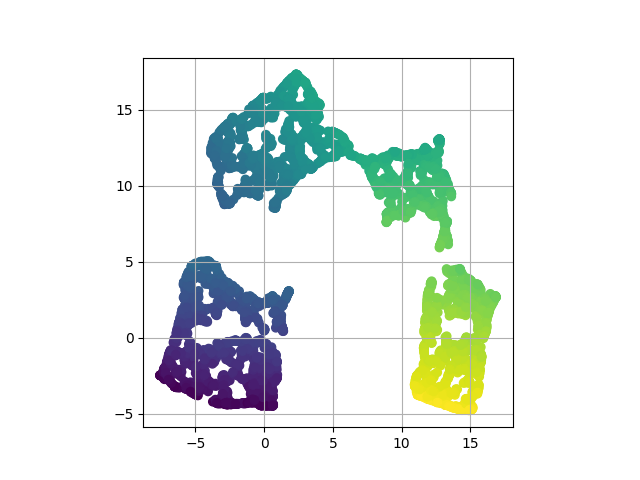

In [23]:
umap_obj = umap.UMAP(n_components=2, random_state=42)
umap_projection = umap_obj.fit_transform(data)

print(trustworthiness(data, umap_projection))
visualization.show_data(umap_projection, labels=labels, square=True)

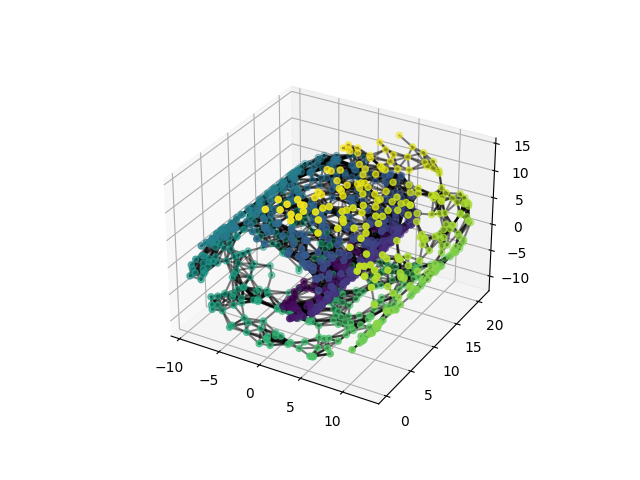

In [27]:
builder = build.CheapestBuilder(weight_fun=weights.get_reciprocal_pow(3), feature_fun=features.feature_coords)
# builder = build.CheapestNNBuilder(weight_fun=weights.get_reciprocal_pow(1), knn=7)
# builder = build.SpanningNNBuilder(weight_fun=weights.get_reciprocal_pow(3), knn=3)
# builder = build.HierarchicalBuilder(weight_fun=weights.get_reciprocal_pow(3))
builder.build(data)
visualization.show_data(data, graph=builder.graph, labels=labels)

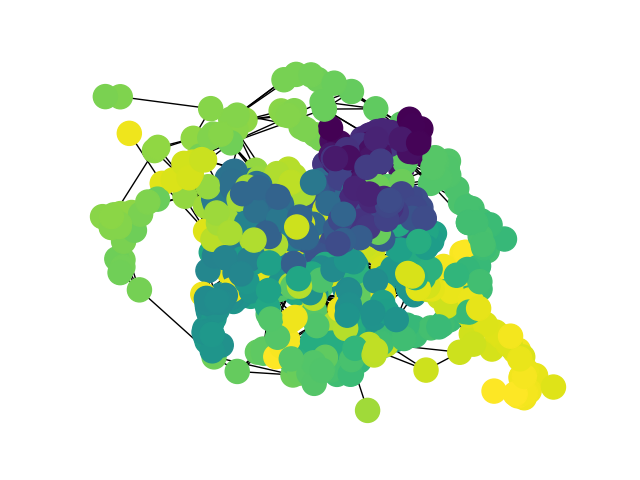

In [28]:
visualization.show_graph(builder.graph, labels=labels)

0.7634326612903226


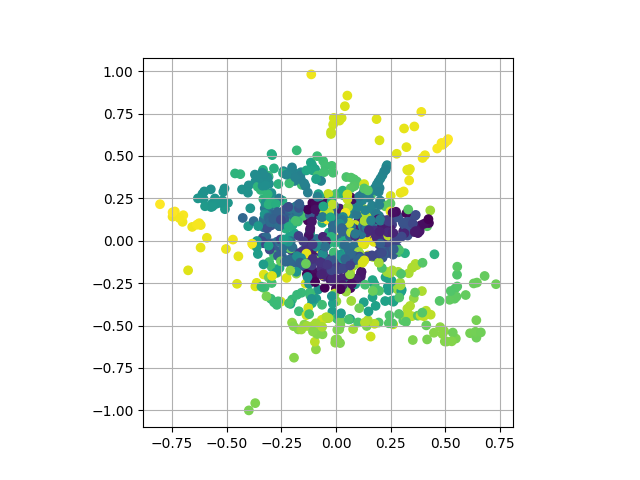

In [29]:

embedder = embedding.SpringEmbedder()
embedder.embed(builder.graph)

print(trustworthiness(data, embedder.embeddings))
visualization.show_data(embedder.embeddings, labels=labels, square=True)

In [30]:
embedder2 = embedding.GraphSAGEEmbedder(epochs=4, num_samples=[10, 5], layer_sizes=[20, 2])
embedder2.embed(builder.graph)

link_classification: using 'ip' method to combine node embeddings into edge embeddings
Epoch 1/4
3600/3600 [==============================] - 293s 81ms/step - loss: 4.2388 - binary_accuracy: 0.7119
Epoch 2/4
3600/3600 [==============================] - 293s 81ms/step - loss: 4.0297 - binary_accuracy: 0.7316
Epoch 3/4
3600/3600 [==============================] - 297s 83ms/step - loss: 3.9751 - binary_accuracy: 0.7365
Epoch 4/4
20/20 [==============================] - 2s 86ms/step


0.94813125


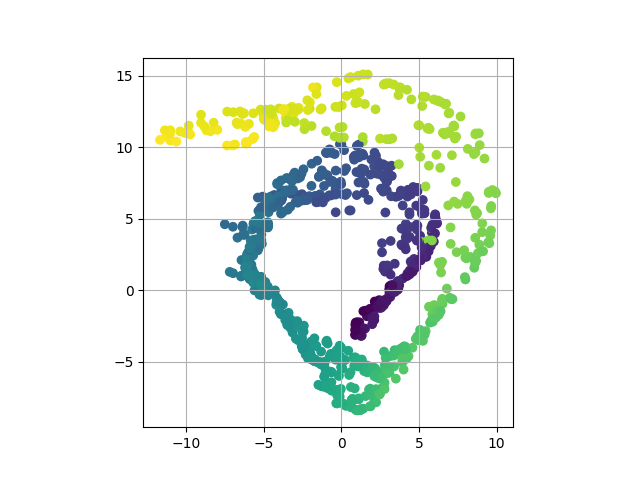

In [31]:
print(trustworthiness(data, embedder2.embeddings))
visualization.show_data(embedder2.embeddings, labels=labels, square=True)

0.9930776209677419


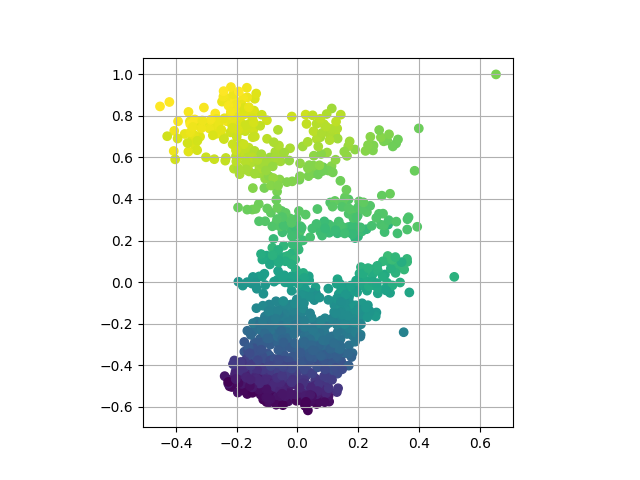

In [33]:
embedder = embedding.KamadaKawaiEmbedder()
embedder.embed(builder.graph)

print(trustworthiness(data, embedder.embeddings))
visualization.show_data(embedder.embeddings, labels=labels, square=True)

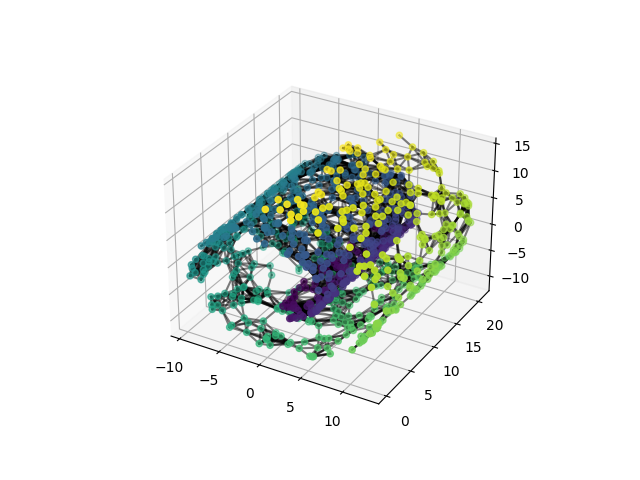

In [5]:
builder = build.CheapestBuilder(weight_fun=weights.reciprocal)
builder.build(data)
visualization.show_data(data, graph=builder.graph, labels=labels)


0.9976641129032258


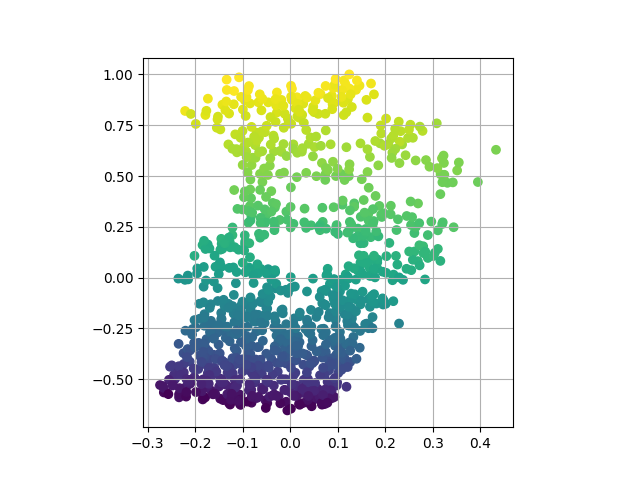

In [6]:

embedder = embedding.KamadaKawaiEmbedder()
embedder.embed(builder.graph)

print(trustworthiness(data, embedder.embeddings))
visualization.show_data(embedder.embeddings, labels=labels, square=True)

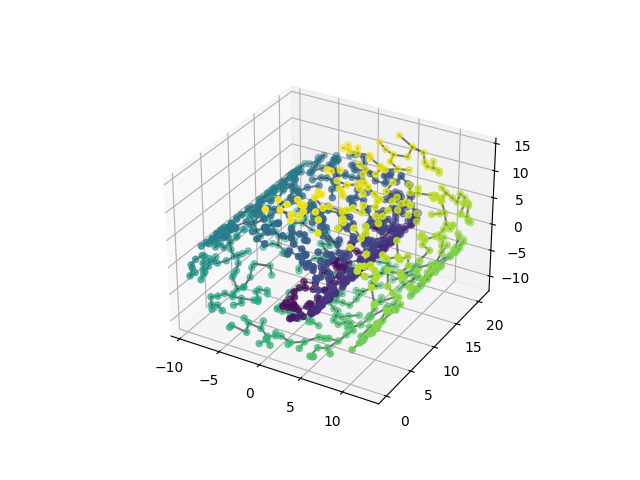

In [7]:
builder = build.SpanningTreeBuilder(weight_fun=weights.reciprocal)
builder.build(data)
visualization.show_data(data, graph=builder.graph, labels=labels)


0.9943346774193549


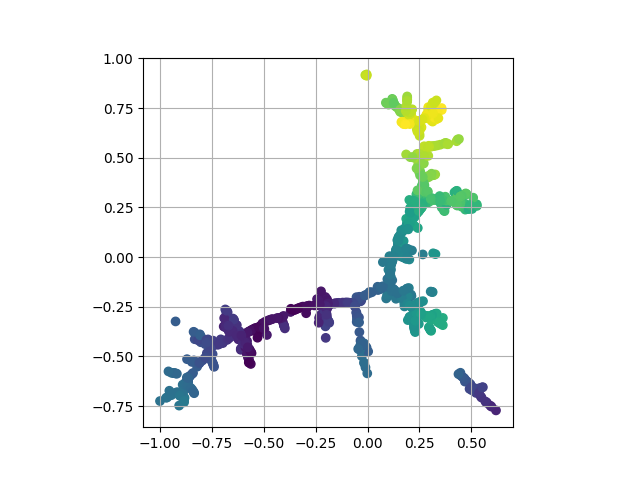

In [8]:
embedder = embedding.KamadaKawaiEmbedder()
embedder.embed(builder.graph)

print(trustworthiness(data, embedder.embeddings))
visualization.show_data(embedder.embeddings, labels=labels, square=True)